In [1]:
#CONNECT TO DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#read the file

import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/CSE303 FILES/lab10,12 sept,2024/banking_2.csv')
print(df)

print(df.head())

        age           job   marital            education  default housing  \
0      49.0   blue-collar   married             basic.9y  unknown      no   
1      37.0  entrepreneur   married    university.degree       no      no   
2      78.0       retired   married             basic.4y       no      no   
3      36.0        admin.   married    university.degree       no     yes   
4      59.0       retired  divorced    university.degree       no      no   
...     ...           ...       ...                  ...      ...     ...   
32945   NaN      services    single          high.school       no     yes   
32946   NaN    technician   married  professional.course       no     yes   
32947   NaN        admin.   married             basic.9y       no      no   
32948   NaN        admin.   married    university.degree       no      no   
32949  35.0        admin.   married    university.degree       no      no   

      loan    contact month day_of_week  duration  campaign  pdays  previou

In [3]:
#checking if there is any null value

df.isnull().sum()

,0
age,32
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


<Axes: >

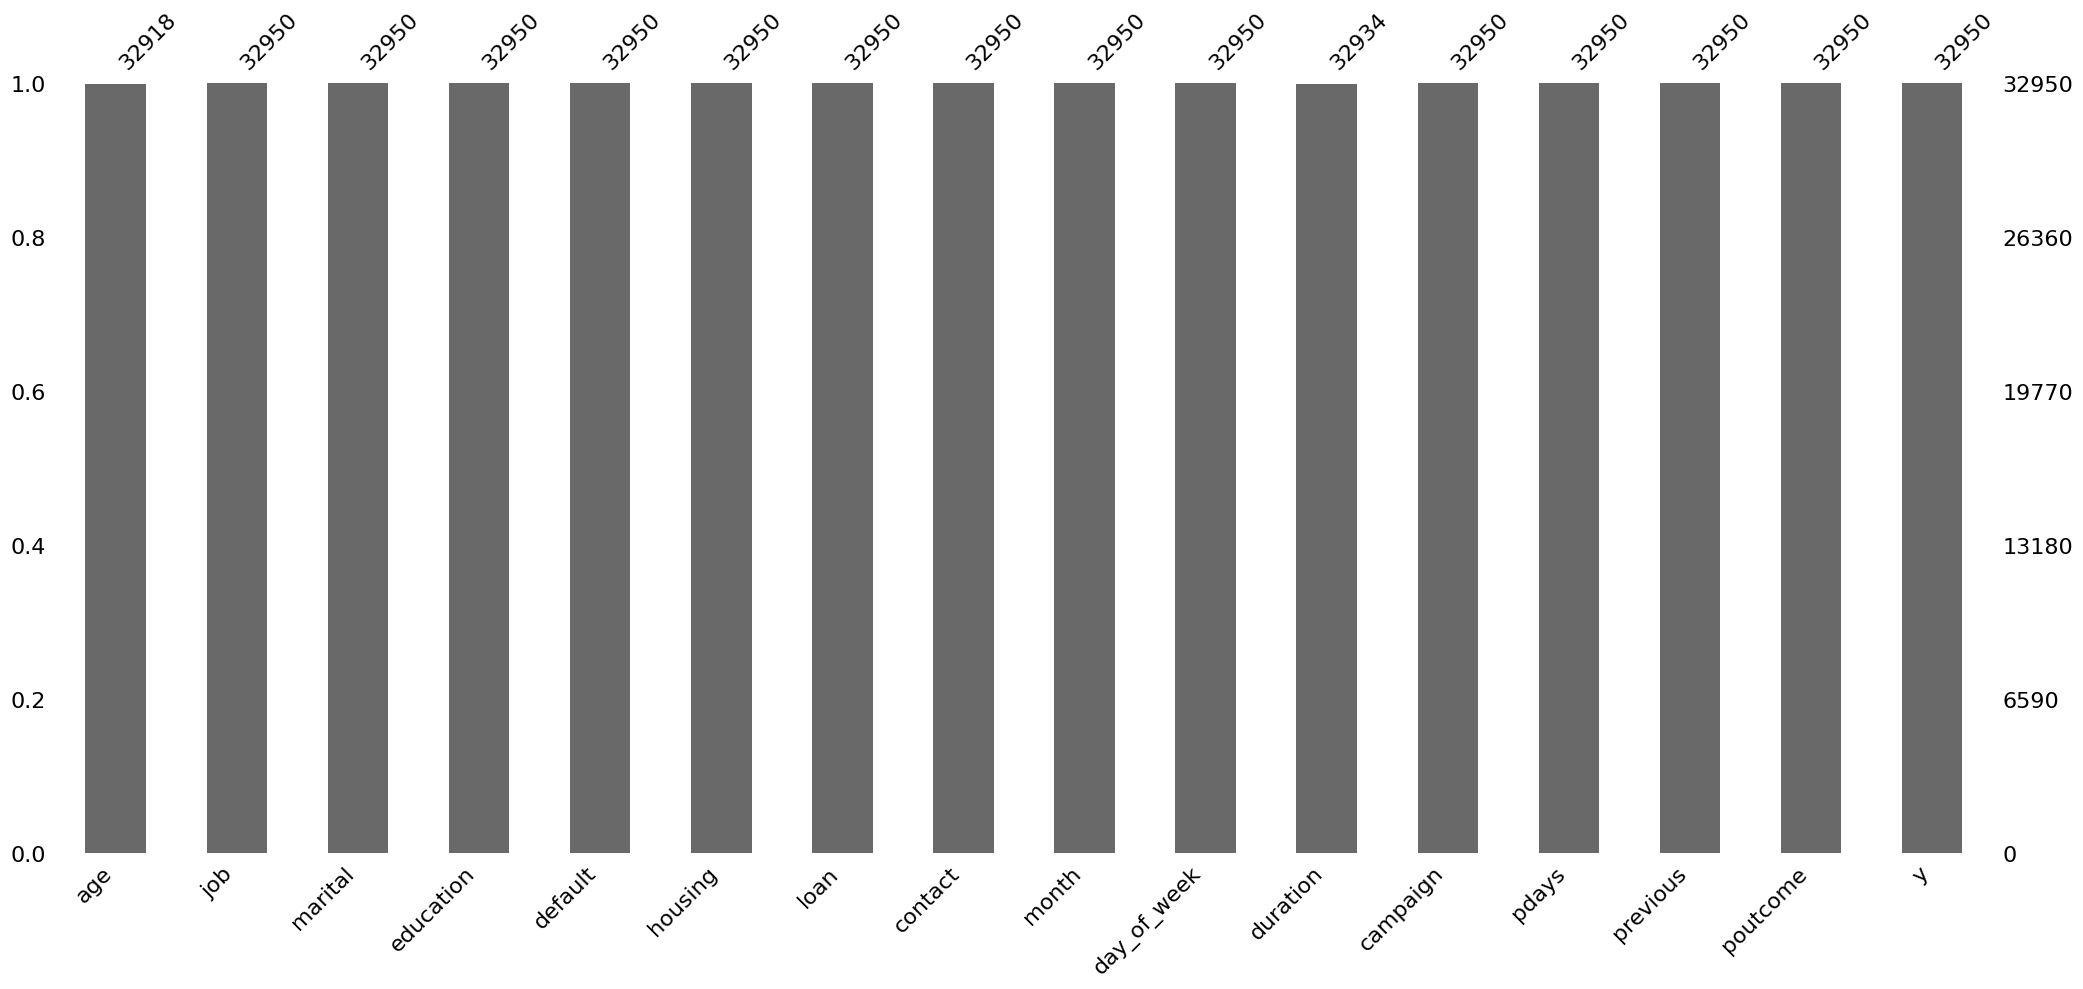

In [4]:
#BAR CHAR TO SEE THE MISSING VALUES
import missingno as msno
msno.bar(df)

In [5]:
#checking outlier in Age


def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['age'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 368
max outlier value: 98.0
min outlier value: 70.0


In [6]:
#checking outlier in DURATION

def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df['duration'])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 2366
max outlier value: 4918.0
min outlier value: 644.0


In [8]:
# description of the data with null values

df.describe()

,age,duration,campaign,pdays,previous
count,32918.000000,32934.000000,32950.000000,32950.000000,32950.000000
mean,40.011240,258.176110,2.560607,962.052413,0.174719
std,10.404187,259.024947,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [10]:
#replacing null with  values for all the missing values ______________
#age =39 , because it is more closer to mean and median and it also balanced the overall dataset mean and median
#duration=219
df['age'] = df['age'].fillna(39)
df.isnull().sum()
df['duration'] = df['duration'].fillna(219)
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [11]:
#new information

df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.010258,258.157086,2.560607,962.052413,0.174719
std,10.399181,258.963486,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


<Axes: >

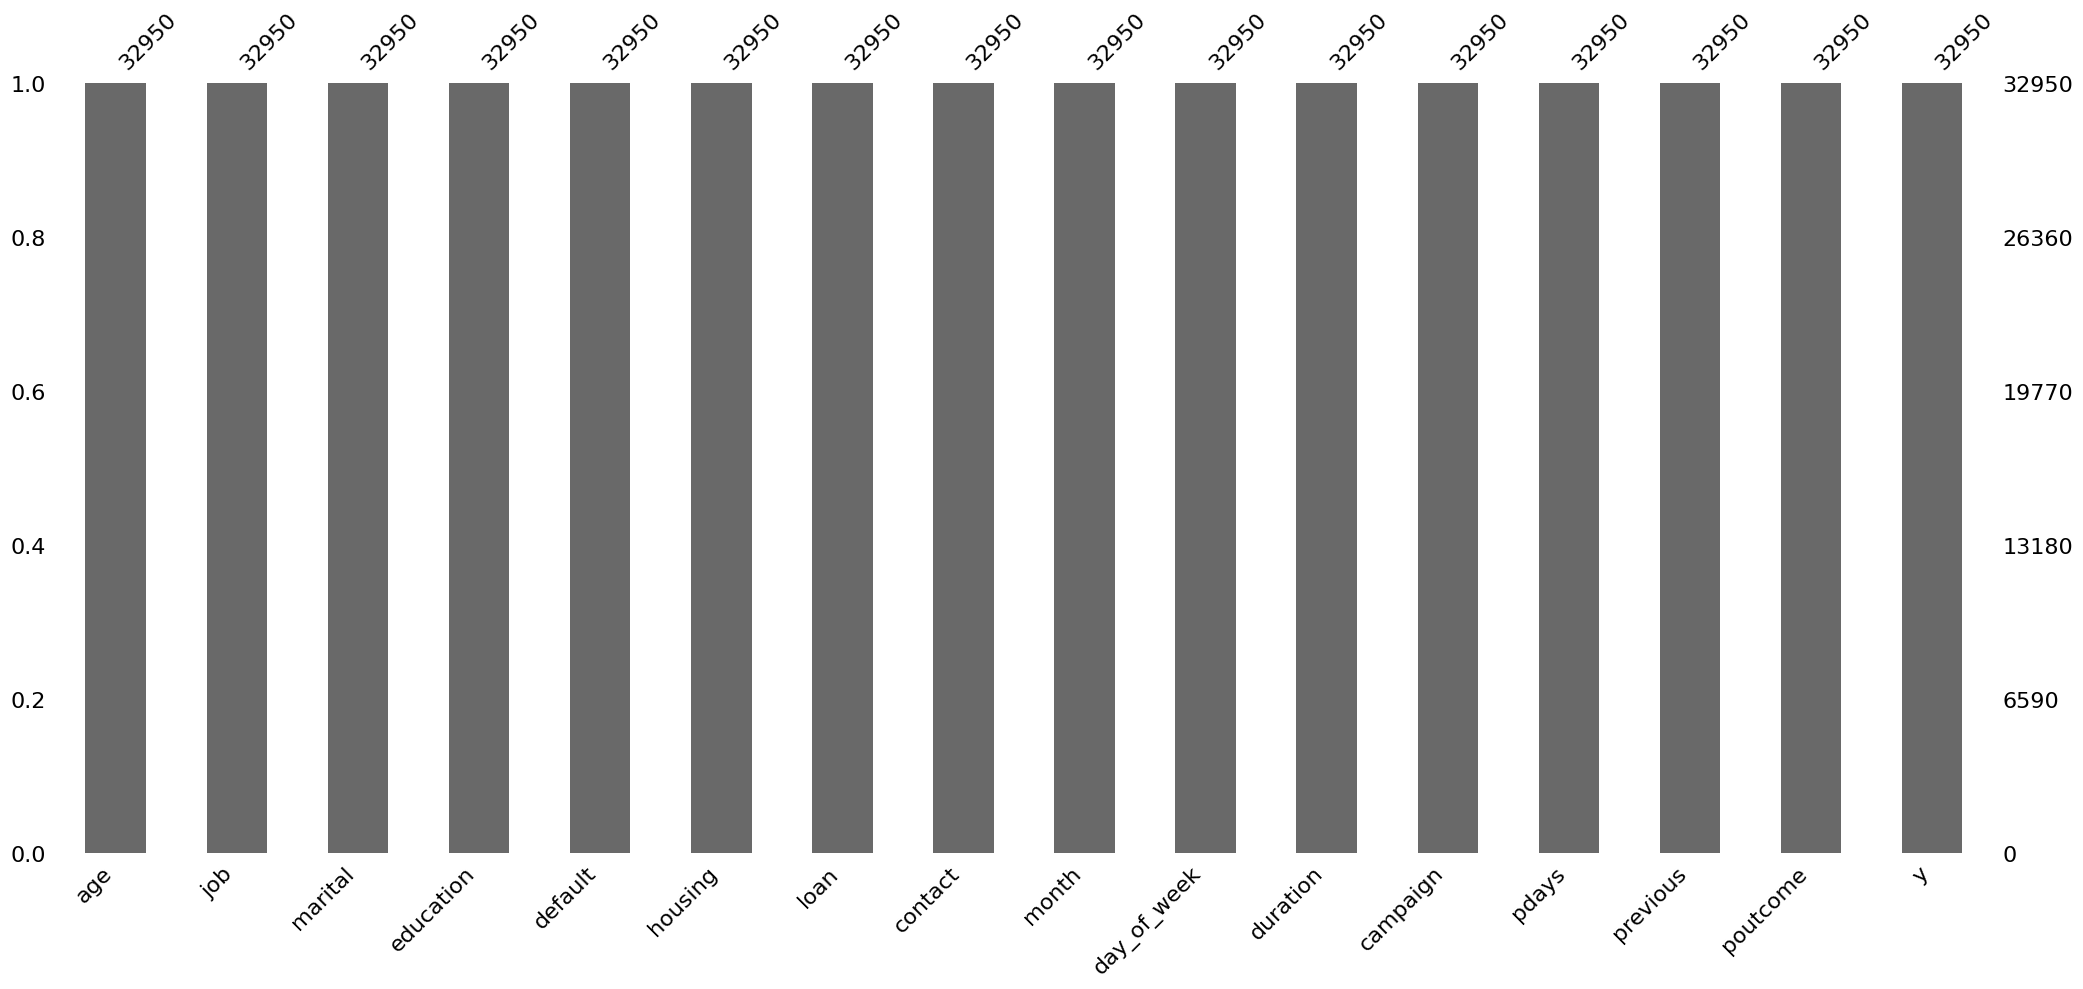

In [12]:
# Visualisation

import missingno as msno
msno.bar(df)

In [13]:
# Define a mapping from education level to numerical value
education_mapping = {
    "illiterate": 1,
    "basic.4y": 2,
    "basic.6y": 3,
    "basic.9y": 4,
    "high.school": 5,
    "professional.course": 6,
    "university.degree": 7,
    "unknown": 8
}

# Apply the mapping to the 'education' column
df['Education_numerical'] = df['education'].map(education_mapping)

# Check if the column 'Education_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed     227.0         4    999         0   
1  telephone   nov         wed     202.0         2    999         1   
2   cellular   jul         mon    1148.0         1    999         0   
3  telephone   may         mon     120.0         2    999         0   
4   cellular   jun         tue     368.0         2    999         0   

      poutcome    y  Education_numerical  
0  nonexistent   no                    4  
1      failure   no           

In [14]:
# Define a mapping from education level to numerical value
job_mapping = {
'admin.':1,
'blue-collar':2,
'entrepreneur':12,
                'housemaid':3,
                'management':4,
                'retired':5,
                'self-employed':6,
                'services':7,
                'student':8,
                'technician':9,
                'unemployed':10,
                'unknown':11
}

# Apply the mapping to the 'education' column
df['Job_numerical'] = df['job'].map(job_mapping)

# Check if the column 'job_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed     227.0         4    999         0   
1  telephone   nov         wed     202.0         2    999         1   
2   cellular   jul         mon    1148.0         1    999         0   
3  telephone   may         mon     120.0         2    999         0   
4   cellular   jun         tue     368.0         2    999         0   

      poutcome    y  Education_numerical  Job_numerical  
0  nonexistent   no                    4              2  


In [15]:
# Creating a new column 'marital_numerical' with the values
import pandas as pd

# Define a mapping from marital level to numerical value
marital_mapping = {
                    'divorced':1,
                    'married':2,
                    'single':3,
                    'unknown':4

}

# Apply the mapping to the 'marital' column
df['Marital_numerical'] = df['marital'].map(marital_mapping)

# Check if the column 'marital_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed     227.0         4    999         0   
1  telephone   nov         wed     202.0         2    999         1   
2   cellular   jul         mon    1148.0         1    999         0   
3  telephone   may         mon     120.0         2    999         0   
4   cellular   jun         tue     368.0         2    999         0   

      poutcome    y  Education_numerical  Job_numerical  Marital_numerical  
0  nonexistent   no                    

In [16]:
 # Define a mapping from default level to numerical value

default_mapping = {
'no':1,
'yes':2,
 'unknown':3
}

# Apply the mapping to the 'default' column
df['Default_numerical'] = df['default'].map(default_mapping)

# Check if the column 'default_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   nov         wed     227.0         4    999         0   
1  telephone   nov         wed     202.0         2    999         1   
2   cellular   jul         mon    1148.0         1    999         0   
3  telephone   may         mon     120.0         2    999         0   
4   cellular   jun         tue     368.0         2    999         0   

      poutcome    y  Education_numerical  Job_numerical  Marital_numerical  \
0  nonexistent   no                   

In [17]:
# Define a mapping from housing level to numerical value
housing_mapping = {
                  'no':1,
                  'yes':2,
                  'unknown':3

}

# Apply the mapping to the 'housing' column
df['Housing_numerical'] = df['housing'].map(housing_mapping)

# Check if the column 'housing_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   nov         wed  ...         4    999         0  nonexistent   
1  telephone   nov         wed  ...         2    999         1      failure   
2   cellular   jul         mon  ...         1    999         0  nonexistent   
3  telephone   may         mon  ...         2    999         0  nonexistent   
4   cellular   jun         tue  ...         2    999         0  nonexistent   

     y Education_numerical  Job_numerical  Marital_numerical  \
0   

In [18]:
# Define a mapping from loan level to numerical value
loan_mapping = {
                  'no':1,
                  'yes':2,
                  'unknown':3

}

# Apply the mapping to the 'housing' column
df['Loan_numerical'] = df['loan'].map(loan_mapping)

# Check if the column 'loan_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  ...  pdays  previous     poutcome    y  \
0   cellular   nov         wed  ...    999         0  nonexistent   no   
1  telephone   nov         wed  ...    999         1      failure   no   
2   cellular   jul         mon  ...    999         0  nonexistent  yes   
3  telephone   may         mon  ...    999         0  nonexistent   no   
4   cellular   jun         tue  ...    999         0  nonexistent   no   

  Education_numerical Job_numerical  Marital_numerical  Default_numerical  \
0                   4

In [19]:
contact_mapping = {
                'cellular':1,
                'telephone':2

}

# Apply the mapping to the 'contact' column
df['Contact_numerical'] = df['contact'].map(contact_mapping)

# Check if the column 'comtact_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  ...  previous     poutcome    y  \
0   cellular   nov         wed  ...         0  nonexistent   no   
1  telephone   nov         wed  ...         1      failure   no   
2   cellular   jul         mon  ...         0  nonexistent  yes   
3  telephone   may         mon  ...         0  nonexistent   no   
4   cellular   jun         tue  ...         0  nonexistent   no   

   Education_numerical Job_numerical Marital_numerical  Default_numerical  \
0                    4             2                 2         

In [20]:
# Define a mapping from month level to numerical value
month_mapping = {
              'jan':1,
              'feb':2,
              'mar':3,
              'apr':4,
              'may':5,
              'jun':6,
              'jul':7,
              'aug':8,
              'sep':9,
              'oct':10,
              'nov':11,
              'dec':12

}

# Apply the mapping to the 'month' column
df['Month_numerical'] = df['month'].map(month_mapping)

# Check if the column 'month_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  ...     poutcome    y  Education_numerical  \
0   cellular   nov         wed  ...  nonexistent   no                    4   
1  telephone   nov         wed  ...      failure   no                    7   
2   cellular   jul         mon  ...  nonexistent  yes                    2   
3  telephone   may         mon  ...  nonexistent   no                    7   
4   cellular   jun         tue  ...  nonexistent   no                    7   

   Job_numerical Marital_numerical Default_numerical  Housing_numerical  \

In [21]:
# Define a mapping from day of week level to numerical value
day_of_week_mapping = {
           'mon':1,
           'tue':2,
           'wed':3,
           'thu':4,
           'fri':5

}

# Apply the mapping to the 'fay of week' column
df['Day_of_week_numerical'] = df['day_of_week'].map(day_of_week_mapping)

# Check if the column 'Day_of_week_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  ...    y  Education_numerical  Job_numerical  \
0   cellular   nov         wed  ...   no                    4              2   
1  telephone   nov         wed  ...   no                    7             12   
2   cellular   jul         mon  ...  yes                    2              5   
3  telephone   may         mon  ...   no                    7              1   
4   cellular   jun         tue  ...   no                    7              5   

   Marital_numerical Default_numerical Housing_numerical  Loan

In [22]:
# Define a mapping from 'y' values to numeric values
y_mapping = {"yes": 1, "no": 0}

# Apply the mapping to the 'y' column
df['Y_numerical'] = df['y'].map(y_mapping)

# Check the result
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  ...  Education_numerical  Job_numerical  \
0   cellular   nov         wed  ...                    4              2   
1  telephone   nov         wed  ...                    7             12   
2   cellular   jul         mon  ...                    2              5   
3  telephone   may         mon  ...                    7              1   
4   cellular   jun         tue  ...                    7              5   

   Marital_numerical  Default_numerical Housing_numerical Loan_numerical  \
0               

In [23]:
# Define a mapping from poutcome level to numerical value
poutcome_mapping = {
         'failure':1,
         'nonexistent':2,
         'success':3
}

# Apply the mapping to the 'poutcome' column
df['Poutcome_numerical'] = df['poutcome'].map(poutcome_mapping)

# Check if the column 'poutcome_numerical' has been added
print(df.head())

    age           job   marital          education  default housing loan  \
0  49.0   blue-collar   married           basic.9y  unknown      no   no   
1  37.0  entrepreneur   married  university.degree       no      no   no   
2  78.0       retired   married           basic.4y       no      no   no   
3  36.0        admin.   married  university.degree       no     yes   no   
4  59.0       retired  divorced  university.degree       no      no   no   

     contact month day_of_week  ...  Job_numerical  Marital_numerical  \
0   cellular   nov         wed  ...              2                  2   
1  telephone   nov         wed  ...             12                  2   
2   cellular   jul         mon  ...              5                  2   
3  telephone   may         mon  ...              1                  2   
4   cellular   jun         tue  ...              5                  1   

   Default_numerical  Housing_numerical Loan_numerical Contact_numerical  \
0                  3        

In [24]:
# Check data types of all columns
df_correlation = df.copy()
print(df_correlation.dtypes)

age                      float64
job                       object
marital                   object
education                 object
default                   object
housing                   object
loan                      object
contact                   object
month                     object
day_of_week               object
duration                 float64
campaign                   int64
pdays                      int64
previous                   int64
poutcome                  object
y                         object
Education_numerical        int64
Job_numerical              int64
Marital_numerical          int64
Default_numerical          int64
Housing_numerical          int64
Loan_numerical             int64
Contact_numerical          int64
Month_numerical            int64
Day_of_week_numerical      int64
Y_numerical                int64
Poutcome_numerical         int64
dtype: object


In [25]:
df_correlation.drop(columns=['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'marital', 'day_of_week'],inplace=True)

In [26]:

correlation = df_correlation.corr()
correlation

,age,duration,campaign,pdays,previous,Education_numerical,Job_numerical,Marital_numerical,Default_numerical,Housing_numerical,Loan_numerical,Contact_numerical,Month_numerical,Day_of_week_numerical,Y_numerical,Poutcome_numerical
age,1.000000,-0.001846,0.003064,-0.032098,0.020463,-0.137543,-0.000295,-0.390569,0.169052,-0.001770,-0.002228,0.007948,0.074025,-0.016564,0.028577,0.020209
duration,-0.001846,1.000000,-0.075714,-0.047064,0.022528,-0.017068,-0.003374,0.011988,-0.010490,-0.010472,0.000635,-0.026113,-0.013212,0.008765,0.400705,0.031321
campaign,0.003064,-0.075714,1.000000,0.053795,-0.079051,-0.002087,-0.009721,-0.002504,0.037550,-0.013140,0.003441,0.074217,-0.031513,0.015930,-0.065462,0.032182
pdays,-0.032098,-0.047064,0.053795,1.000000,-0.589601,-0.047951,-0.018749,-0.042240,0.081504,-0.010028,0.004962,0.116561,-0.082392,0.004646,-0.325539,-0.471766
previous,0.020463,0.022528,-0.079051,-0.589601,1.000000,0.043878,0.013805,0.041776,-0.106542,0.025526,-0.000368,-0.212673,0.062157,0.004521,0.229759,-0.312112
Education_numerical,-0.137543,-0.017068,-0.002087,-0.047951,0.043878,1.000000,0.121430,0.117187,-0.193969,0.015752,-0.000540,-0.100908,0.117277,0.005252,0.057205,0.012859
Job_numerical,-0.000295,-0.003374,-0.009721,-0.018749,0.013805,0.121430,1.000000,0.010567,-0.023225,0.008229,-0.010586,-0.012203,0.043295,-0.007762,0.013554,0.006099
Marital_numerical,-0.390569,0.011988,-0.002504,-0.042240,0.041776,0.117187,0.010567,1.000000,-0.082600,0.013539,0.002321,-0.054736,-0.018937,0.012713,0.050084,0.003132
Default_numerical,0.169052,-0.010490,0.037550,0.081504,-0.106542,-0.193969,-0.023225,-0.082600,1.000000,-0.015224,-0.000581,0.137116,-0.086438,-0.002952,-0.099107,0.026792
Housing_numerical,-0.001770,-0.010472,-0.013140,-0.010028,0.025526,0.015752,0.008229,0.013539,-0.015224,1.000000,0.290813,-0.064662,0.023366,-0.008713,0.009023,-0.016126


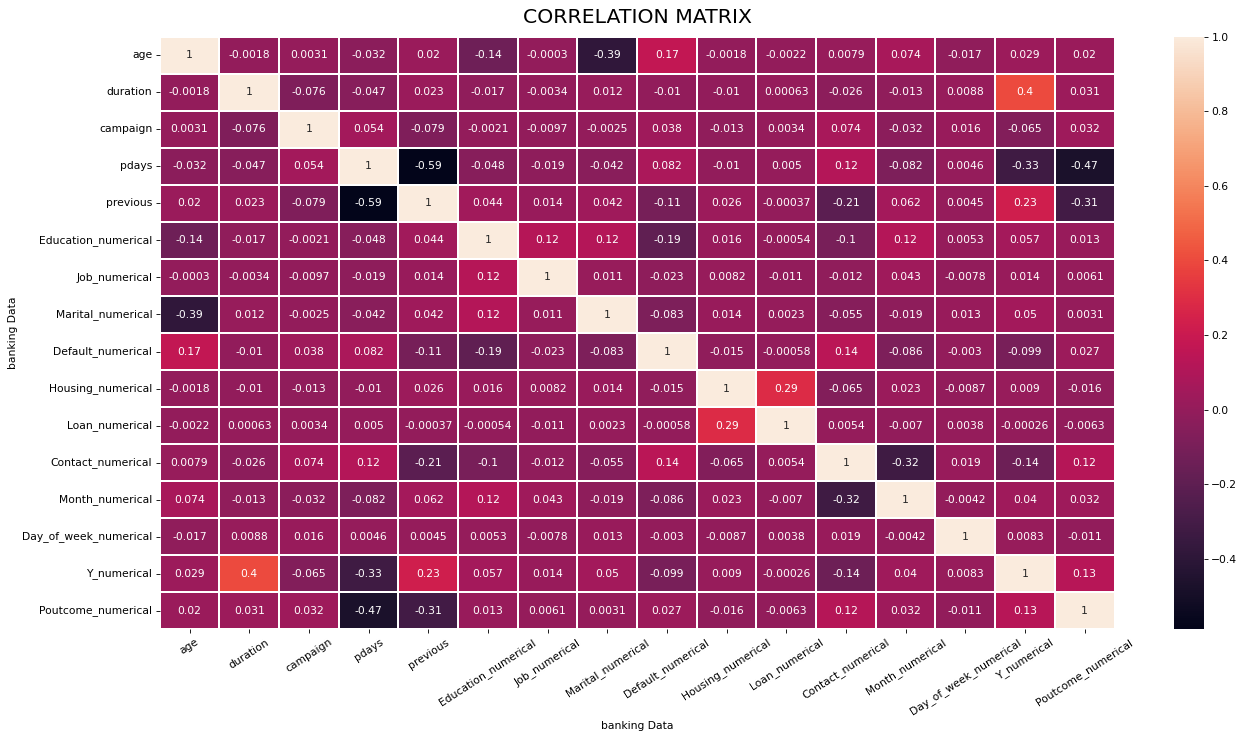

In [27]:
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

plt.figure(figsize=(20,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('banking Data')
plt.ylabel('banking Data')
plt.xticks(rotation=33)
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
x=df_correlation.drop('Y_numerical',axis=1)
y=df_correlation['Y_numerical']
reg.fit(x,y)

print(x)
print(y)

        age  duration  campaign  pdays  previous  Education_numerical  \
0      49.0     227.0         4    999         0                    4   
1      37.0     202.0         2    999         1                    7   
2      78.0    1148.0         1    999         0                    2   
3      36.0     120.0         2    999         0                    7   
4      59.0     368.0         2    999         0                    7   
...     ...       ...       ...    ...       ...                  ...   
32945  39.0     192.0         1    999         0                    5   
32946  39.0      64.0         1    999         1                    6   
32947  39.0     131.0         4    999         0                    4   
32948  39.0     165.0         1    999         0                    7   
32949  35.0     544.0         3    999         0                    7   

       Job_numerical  Marital_numerical  Default_numerical  Housing_numerical  \
0                  2                  2   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Splitting into Train and Test Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

# First, fit the model with training data
reg.fit(X_train, y_train)

# Then, you can use the predict method
y_pred = reg.predict(X_test)

# Print the predicted values
print(y_pred)


        age  duration  campaign  pdays  previous  Education_numerical  \
6986   43.0     319.0         2    999         0                    2   
664    40.0     609.0         1    999         0                    6   
9852   55.0      89.0        13    999         0                    6   
22102  37.0      78.0         1    999         1                    3   
13963  34.0     104.0         2    999         1                    5   
...     ...       ...       ...    ...       ...                  ...   
20757  25.0      37.0        17    999         0                    4   
32103  52.0     114.0        12    999         0                    2   
30403  56.0     119.0         5    999         0                    2   
21243  42.0     408.0         5    999         0                    2   
2732   26.0      34.0         3    999         0                    5   

       Job_numerical  Marital_numerical  Default_numerical  Housing_numerical  \
6986               2                  2   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
y_pred = reg.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9067273646939807

In [37]:
#  tuning = 1

from sklearn.linear_model import LogisticRegression
reg_tune = LogisticRegression(penalty='none',random_state=0)
reg_tune.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=0)

In [39]:
y_pred1 = reg_tune.predict(X_test)
print(y_pred1)

[0 0 0 ... 0 0 0]


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.9068285280728376

In [41]:
# tunning model = 2
from sklearn.linear_model import LogisticRegression
reg_tune2 = LogisticRegression(penalty='none',random_state=0)
reg_tune2.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none', random_state=0)

In [44]:
y_pred2 = reg_tune2.predict(X_test)
print(y_pred2)

[0 0 0 ... 0 0 0]


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.9068285280728376

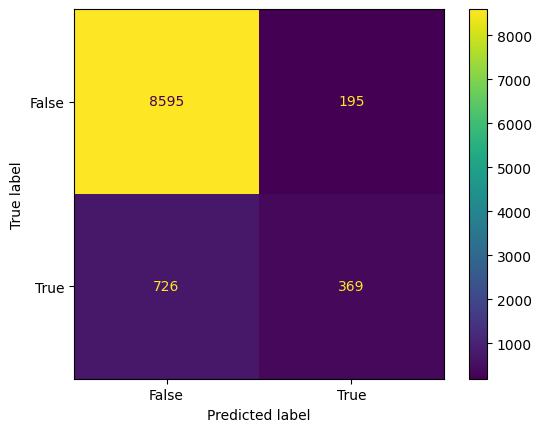

In [46]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

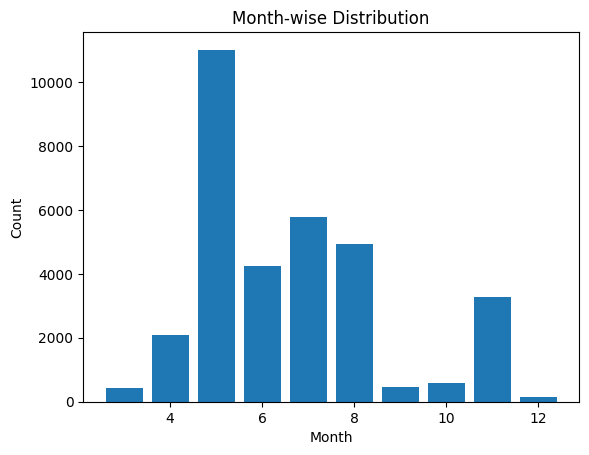

In [50]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each month
month_counts = df['Month_numerical'].value_counts().sort_index()

# Create a bar chart
plt.bar(month_counts.index, month_counts.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month-wise Distribution')

# Display the plot
plt.show()

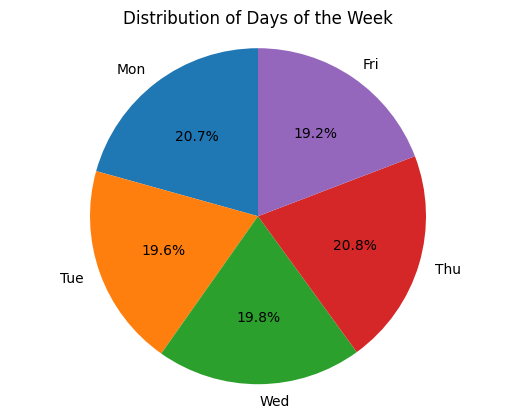

In [51]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each day of the week
day_counts = df['Day_of_week_numerical'].value_counts().sort_index()

# Labels for the pie chart (convert numerical values back to day names)
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Create the pie chart
plt.pie(day_counts, labels=day_labels, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Distribution of Days of the Week')

# Display the chart
plt.show()


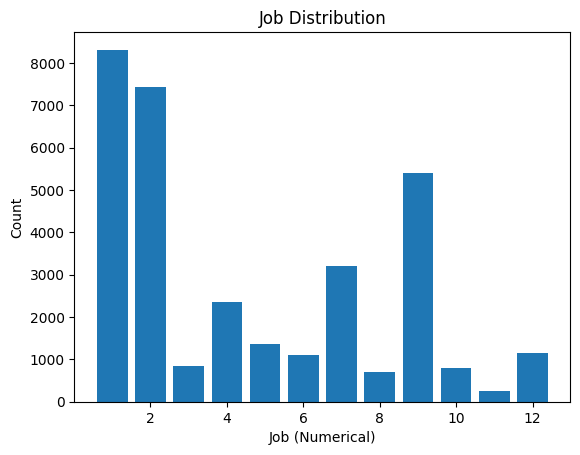

In [52]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each job
job_counts = df['Job_numerical'].value_counts().sort_index()

# Create a bar plot
plt.bar(job_counts.index, job_counts.values)

# Add labels and title
plt.xlabel('Job (Numerical)')
plt.ylabel('Count')
plt.title('Job Distribution')

# Display the plot
plt.show()


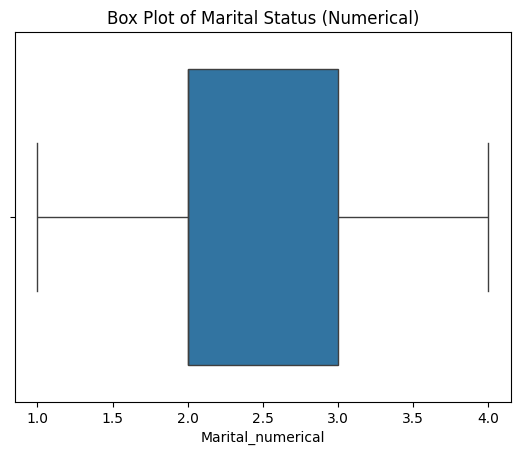

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the 'Marital_numerical' column
sns.boxplot(x=df['Marital_numerical'])

# Add a title
plt.title('Box Plot of Marital Status (Numerical)')

# Display the plot
plt.show()


1. Bar Chart (Job Distribution)
What it shows: The bar chart represents the number of people in different job categories (e.g., admin, blue-collar, etc.).
How to read it: Each bar's height shows how many people belong to each job category. Taller bars mean more people in that job, and shorter bars mean fewer people.
2. Pie Chart (Days of the Week Distribution)
What it shows: The pie chart shows how the different days of the week (Monday to Friday) are distributed in your data.
How to read it: Each slice of the pie represents a day, and its size shows the percentage of people for that day. Larger slices mean that day has more people in the data.
3. Box Plot (Marital Status)
What it shows: The box plot represents the distribution of marital status (divorced, married, single, and unknown) in the data.
How to read it: The box shows where the majority of marital status values are, and the "whiskers" extending from the box show the full range of the data. Any dots outside the whiskers are potential outliers, which could indicate uncommon marital statuses.
In summary:

Bar chart: Helps compare the number of people in different job categories.
Pie chart: Shows the proportion of people across days of the week.
Box plot: Displays the spread and variation of marital statuses, helping you see how the values are distributed and if there are any outliers.